In [1]:
##run these commands in case you run into an import error meaning you don't have the libraries installed
##this means that you should remove all the hashtag "#" from the following 5 lines in this cell
#!pip install torch
#!pip install numpy
#!pip install matplotlib
#!pip install scikit-learn
#!pip install random

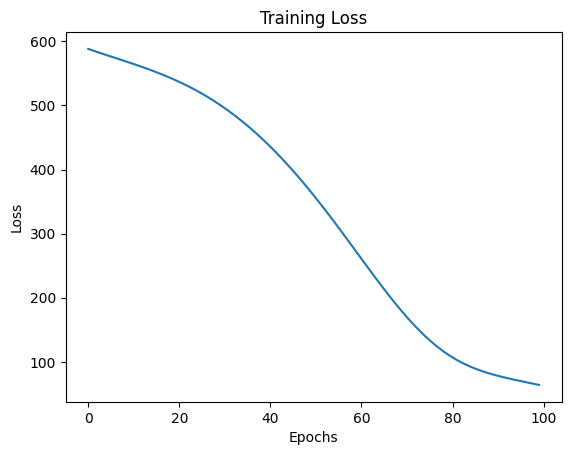

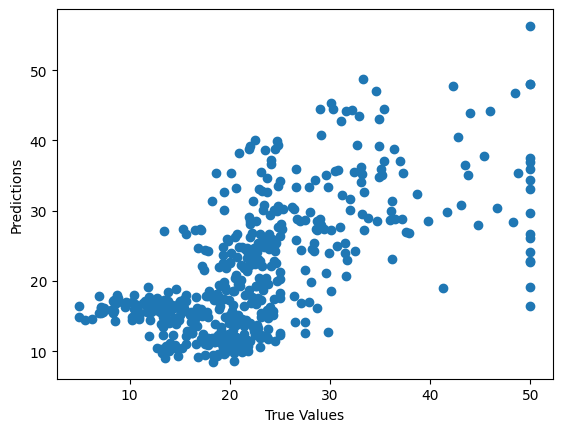


Some predictions vs real values:
Real value: 15.6 Predicted value: 11.022607
Real value: 14.9 Predicted value: 16.857271
Real value: 19.5 Predicted value: 14.861883
Real value: 19.3 Predicted value: 10.023532
Real value: 13.4 Predicted value: 27.114626
Real value: 22.6 Predicted value: 22.689745
Real value: 12.0 Predicted value: 14.435319
Real value: 26.6 Predicted value: 33.327705
Real value: 23.0 Predicted value: 11.939368
Real value: 20.4 Predicted value: 8.646205


In [2]:
# Import necessary libraries for further processing
import torch # for neural networks and deep learning
import torch.nn as nn # for neural networks and deep learning
import torch.optim as optim # for neural networks and deep learning
import numpy as np # for mathematical operations
import matplotlib.pyplot as plt # for visualization 
import pandas as pd # for reading the data into the code

# Load the Boston housing dataset from the original source
# Load the dataset, containing houses information and their prices
# Xs are the information and Ys are the house prices

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Normalize the data (scaling to make all features within a similar range for distance normalization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(data)

# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(x_train_normalized, dtype=torch.float32)
y_train_tensor = torch.tensor(target, dtype=torch.float32).view(-1, 1)

# Define the model architecture
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(13, 64)
        self.fc2 = nn.Linear(64, 64) # hidden layer feel free to add more after it exactly like it
        self.fc3 = nn.Linear(64, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create model instance
model = RegressionModel()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

# Train the model
num_epochs = 100
losses = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# Plot training loss
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


# Make predictions
predictions = model(x_train_tensor).detach().numpy()
# Plot actual vs. predicted values
plt.scatter(target, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()




# Make predictions
predictions = model(x_train_tensor).detach().numpy()

import random # for selecing random samples on test on
# Print some predictions vs the real values
print('\nSome predictions vs real values:')
for i in range(10):
    index = random.randint(1, len(target)) - 1
    print("Real value:", target[index], "Predicted value:", predictions[index][0])

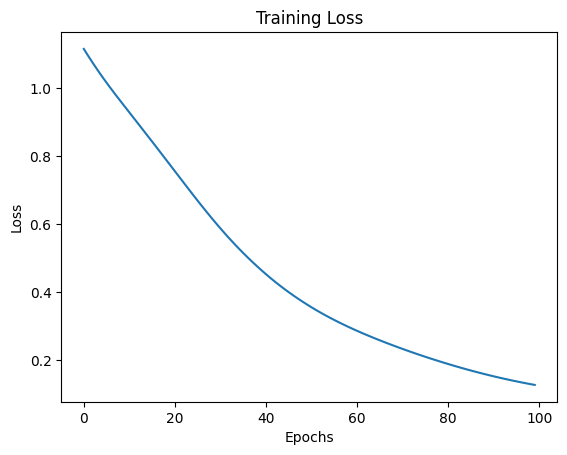

Test Accuracy: 1.0

Some predictions vs real values:
Real class: 0 Predicted class: tensor(0)
Real class: 2 Predicted class: tensor(2)
Real class: 1 Predicted class: tensor(1)
Real class: 1 Predicted class: tensor(1)
Real class: 1 Predicted class: tensor(1)
Real class: 2 Predicted class: tensor(2)
Real class: 1 Predicted class: tensor(1)
Real class: 0 Predicted class: tensor(0)
Real class: 2 Predicted class: tensor(2)
Real class: 2 Predicted class: tensor(2)


In [3]:
# Import necessary libraries
import torch # for neural network and deep learning
import torch.nn as nn # for neural network and deep learning
import torch.optim as optim # for neural network and deep learning
import numpy as np # for mathematical operations
import matplotlib.pyplot as plt # for visualizations 
from sklearn.datasets import load_iris # for loading the iris flower data
from sklearn.preprocessing import StandardScaler # for normalizing the data
from sklearn.model_selection import train_test_split # for training and testing the A.I. model to make sure it's good and working

# Load the Iris dataset
iris = load_iris()
#x is information about the flower while y contains which type of the flower it is for the given info.
x, y = iris.data, iris.target

# Normalize the data (scaling to make all features within a similar range for distance normalization)
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

# Split data into training and testing sets for the model to study and get tested
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Define the model architecture
class ClassificationModel(nn.Module):
    def __init__(self):
        super(ClassificationModel, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 3)
    
    def forward(self, x): # forward propagation.
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create model instance
model = ClassificationModel()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Train the model
num_epochs = 100
losses = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward() # backward propagation
    optimizer.step()
    losses.append(loss.item())

# Plot training loss
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Evaluate the model on test data
with torch.no_grad():
    outputs = model(x_test_tensor)
    predicted_classes = torch.argmax(outputs, dim=1)
    accuracy = (predicted_classes == y_test_tensor).sum().item() / len(y_test_tensor)
    print("Test Accuracy:", accuracy)

# Make predictions
with torch.no_grad():
    outputs = model(x_test_tensor)
    predicted_classes = torch.argmax(outputs, dim=1)
# Print some predictions vs the real values
import random # for selecing random samples on test on
print('\nSome predictions vs real values:')
for i in range(10):
    index = random.randint(1, len(y_test)) - 1
    print("Real class:", y_test[index], "Predicted class:", predicted_classes[index])
